In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


Добавление Полиномиальных признаков в Линейную регрессию, для отлова неленейности
* X — это признаки (одно измерение: значение от 0 до 5).

* y — синусоида с шумом (настоящая зависимость).

In [47]:
# 1. Генерируем нелинейные данные
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # значения от 0 до 5
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # нелинейная зависимость + шум
print(X[95:100][::-1])

[[4.94186919]
 [4.89309171]
 [4.88380544]
 [4.88229733]
 [4.8183138 ]]


In [35]:
# TODO 2. Строим scatter с графиком линейной регрессии
model =  LinearRegression()
model.fit(X, y)

LinearRegression()

In [48]:
# 3. Предсказания модели
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = model.predict(X_plot)


Text(0.5, 1.0, 'scatter_plot показывает нелинейность данных')

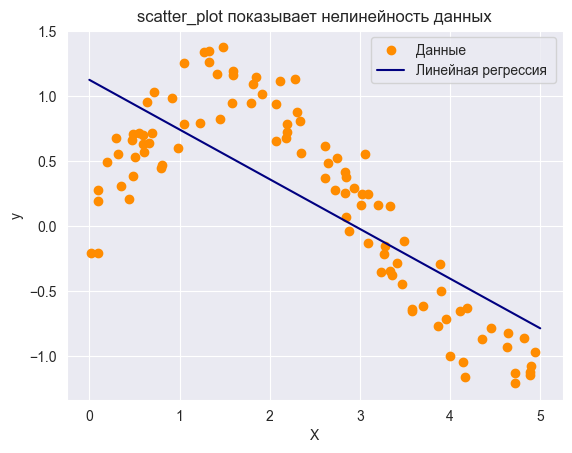

In [41]:
# 4. Визуализация
plt.scatter(X, y, color='darkorange', label='Данные')
plt.plot(X_plot, y_pred, color='navy', label=f'Линейная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('scatter_plot показывает нелинейность данных')
# plt.show()

🔲 Добавим Признак со степенями

In [58]:
# TODO 2. Строим полиномиальную регрессию степени 3, degree - максимальная степень полинома

# degree = 2 # если добавить степени признака 2, то апроксимация будет недостаточной
degree = 3  # достаточная степень признака
model_1 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_1.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [59]:
# 3. Предсказания модели
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = model_1.predict(X_plot)


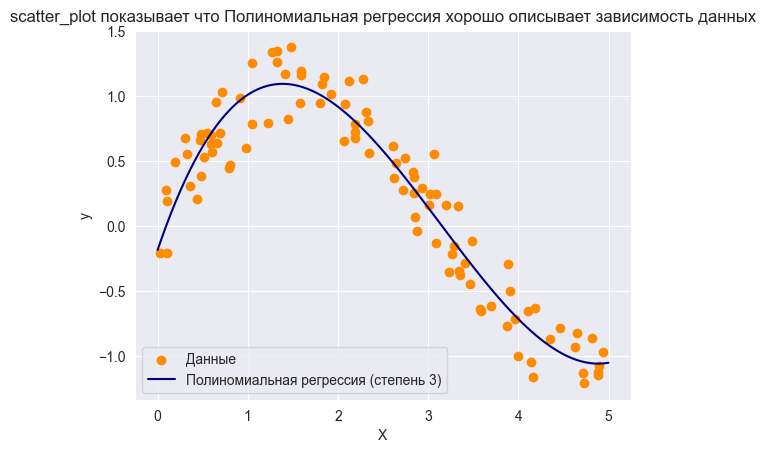

In [63]:
# 4. Визуализация
plt.scatter(X, y, color='darkorange', label='Данные')
plt.plot(X_plot, y_pred, color='navy', label=f'Полиномиальная регрессия (степень {degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('scatter_plot показывает что Полиномиальная регрессия хорошо описывает зависимость данных')
plt.show()